In [155]:
#-*-coding:utf-8-*-
import pandas as pd
import numpy as np
from pandas import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import time
import tensorflow as tf
from numpy import ndarray
from datetime import timedelta
import autokeras as ak

#만든 모듈을 불러옴
import sys
from importlib import reload
sys.path.append('Desktop/2021 AI 빅데이터팀/메탈 수요예측/code/') 
print(sys.path)
import Timeseries_module_ykkim as tsm

<ipython-input-155-1a24c12ea9ea>:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


['C:\\Users\\KIMYEONKYOUNG\\Desktop\\2021 AI 빅데이터팀\\메탈 수요예측\\code', 'C:\\ProgramData\\Anaconda3\\python38.zip', 'C:\\ProgramData\\Anaconda3\\DLLs', 'C:\\ProgramData\\Anaconda3\\lib', 'C:\\ProgramData\\Anaconda3', '', 'C:\\ProgramData\\Anaconda3\\lib\\site-packages', 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\win32', 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\Pythonwin', 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\KIMYEONKYOUNG\\.ipython', 'Desktop/2021 AI 빅데이터팀/메탈 수요예측/code/', 'Desktop/2021 AI 빅데이터팀/메탈 수요예측/code/', 'Desktop/2021 AI 빅데이터팀/메탈 수요예측/code/']


In [2]:
data=pd.read_excel('C:/Users/KIMYEONKYOUNG/Desktop/2021 AI 빅데이터팀/메탈 수요예측/data/RawData_v1.3.xlsx')

In [3]:
column='RS1'
dd = tsm.ts_data(data,column)

In [4]:
# #Z-Normalization
# data_mean = dd.mean(axis=0)
# data_std = dd.std(axis=0)
# zdd = (dd-data_mean)/data_std

# train,test split(cv)

In [88]:
train,test_nu=tsm.TS_holdout(dd,5)  # train : 2016~2020.10

In [136]:
train_nu,test=tsm.TS_holdout(dd,15)  # test : 5개월

In [137]:
print(train.index.min(), '~',train.index.max() )

2016-01-01 00:00:00 ~ 2020-10-01 00:00:00


In [57]:
# test_cutoff_date= dd.index.max() - timedelta(days=5*28) # test : 5개월
# val_cutoff_date=dd.index.max() - timedelta(days=20*30) # validation : 10개월

In [58]:
# df_test = dd[dd.index > test_cutoff_date]
# df_val = dd[(dd.index > val_cutoff_date) & (dd.index <= test_cutoff_date)]
# df_train = dd[dd.index <= val_cutoff_date]

# data preprocessing

In [7]:
# #Z-Normalization
# data_mean = train.mean(axis=0)
# data_std = train.std(axis=0)

In [138]:
# dateaframe to tensor
nd=np.asarray(train)
ndd=nd.reshape(len(train),)

In [139]:
def split_sequence(sequence:ndarray, n_steps:int)->(ndarray, ndarray):
    x = []
    y = [] 
    for i in range(len(sequence)):
        if(i+n_steps>=len(sequence)):
            break 
        x.append(sequence[i:i+n_steps]) 
        y.append(sequence[i+n_steps]) 
    return (np.asarray(x), np.asarray(y)) 


In [140]:
n_steps = 10
(x, y) = split_sequence(ndd, n_steps) 
print(x.shape) 
print(y.shape)
# from keras.preprocessing.sequence import TimeseriesGenerator
# generator = TimeseriesGenerator(train, targets=train, length=5, batch_size=1)
# generator

(48, 10)
(48,)


In [141]:
n_features = 1 
x = x.reshape(x.shape[0], n_steps, n_features)
print(x.shape) 

(48, 10, 1)


In [ ]:
#########timesplit 

In [24]:
# from sklearn.model_selection import TimeSeriesSplit
# tscv=TimeSeriesSplit(n_splits=5) #, test_size=1
# print(tscv)

TimeSeriesSplit(max_train_size=None, n_splits=5)


In [79]:
# for train_index, test_index in tscv.split(x):
#         print("TRAIN:", train_index, "TEST:", test_index)
#         X_train, X_test = x[train_index], x[test_index]
#         y_train, y_test = y[train_index], y[test_index]

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12] TEST: [13 14 15 16 17 18 19 20 21]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21] TEST: [22 23 24 25 26 27 28 29 30]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30] TEST: [31 32 33 34 35 36 37 38 39]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39] TEST: [40 41 42 43 44 45 46 47 48]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48] TEST: [49 50 51 52 53 54 55 56 57]


In [77]:
# from sklearn.model_selection import TimeSeriesSplit
# tscv = TimeSeriesSplit(n_splits=5)
# i = 1
# score = []
# for tr_index, val_index in tscv.split(X_train):
#     X_tr, X_val = X_train[tr_index], X_train[val_index]
#     y_tr, y_val = y_train[tr_index], y_train[val_index]
#     for mf in np.linspace(100, 150, 6):
#         for ne in np.linspace(50, 100, 6):
#             for md in np.linspace(20, 40, 5):
#                 for msl in np.linspace(30, 100, 8):
#                     rfr = RandomForestRegressor(
#                         max_features=int(mf),
#                         n_estimators=int(ne),
#                         max_depth=int(md),
#                         min_samples_leaf=int(msl))
#                     rfr.fit(X_tr, y_tr)
#                     score.append([i,
#                                   mf, 
#                                   ne,
#                                   md, 
#                                   msl, 
#                                   rfr.score(X_val, y_val)])
#     i += 1

NameError: name 'RandomForestRegressor' is not defined

In [142]:
# train(train,val)
# Hyperparameter Setting
BATCH_SIZE = 1
BUFFER_SIZE=100

# Dataset -> Tensor
train_univariate = tf.data.Dataset.from_tensor_slices((x, y))
train_univariate = train_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_univariate = tf.data.Dataset.from_tensor_slices((x, y))
val_univariate = val_univariate.batch(BATCH_SIZE).repeat()

# LSTM model(univariate, simple)_train

In [143]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [144]:
path_checkpoint = "lstm_model_checkpoint_try4.h5"
es_callback = tf.keras.callbacks.EarlyStopping(monitor="loss", min_delta=0, patience=100, mode='auto')# mode=auto loss면 최저값100번정도 반복되면 정지, acc면 최고값이 100번정도 반복되면 정지

modelckpt_callback = tf.keras.callbacks.ModelCheckpoint(
    monitor="loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,)

In [145]:
# Build Simple LSTM Model
simple_lstm_model = tf.keras.models.Sequential([
#     tf.keras.layers.LSTM(10, activation = 'relu', input_shape=(n_steps,1),return_sequences=True),#
    tf.keras.layers.LSTM(10, activation = 'relu', input_shape=(n_steps,1)), 
#     tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(5),   
    tf.keras.layers.Dense(1)
])

simple_lstm_model.compile(optimizer='adam', loss='mse',metrics=['mse'])


In [148]:
# Train the Model(val)
EVALUATION_INTERVAL = 30
EPOCHS = 300

history=simple_lstm_model.fit(train_univariate, epochs=EPOCHS,validation_data=val_univariate,steps_per_epoch=EVALUATION_INTERVAL,validation_steps=10,verbose=1,callbacks=[es_callback, modelckpt_callback])

Epoch 1/300
30/30 [==============================] - 0s 11ms/step - loss: 485.4670 - mse: 485.4670 - val_loss: 300.1455 - val_mse: 300.1455

Epoch 00001: loss did not improve from 128.15305
Epoch 2/300
30/30 [==============================] - 0s 12ms/step - loss: 375.3823 - mse: 375.3823 - val_loss: 307.1506 - val_mse: 307.1506

Epoch 00002: loss did not improve from 128.15305
Epoch 3/300
30/30 [==============================] - 0s 9ms/step - loss: 391.0331 - mse: 391.0331 - val_loss: 294.5851 - val_mse: 294.5851

Epoch 00003: loss did not improve from 128.15305
Epoch 4/300
30/30 [==============================] - 0s 8ms/step - loss: 516.8156 - mse: 516.8156 - val_loss: 304.9413 - val_mse: 304.9413

Epoch 00004: loss did not improve from 128.15305
Epoch 5/300
30/30 [==============================] - 0s 9ms/step - loss: 473.2496 - mse: 473.2496 - val_loss: 327.0284 - val_mse: 327.0284

Epoch 00005: loss did not improve from 128.15305
Epoch 6/300
30/30 [==============================] - 

In [133]:
def visualize_loss(history, title):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(len(loss))
    plt.figure()
    plt.plot(epochs, loss, "b", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

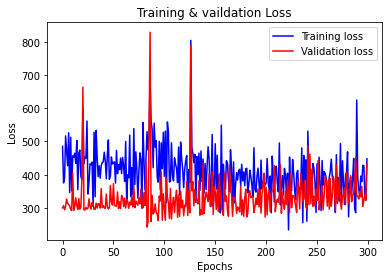

In [149]:
visualize_loss(history, "Training & vaildation Loss")

 # predict

In [150]:
ndt=np.asarray(test)
nddt=ndt.reshape(len(test),)

In [151]:
(xt, yt) = split_sequence(nddt, n_steps) 

In [152]:
xtt = xt.reshape(xt.shape[0], n_steps, n_features)

In [23]:
yhat = simple_lstm_model.predict(xtt)
prediction=pd.DataFrame(yhat)
prediction.columns=['predicted']
prediction.index=test[5:].index

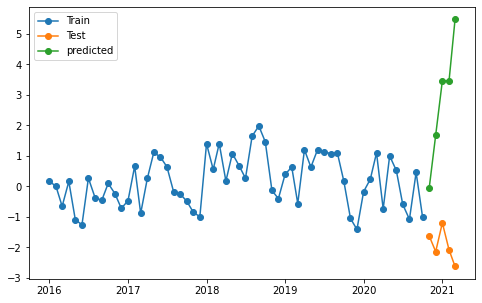

In [24]:
#graph
tsm.predict_graph(train,test_nu,prediction)

In [25]:
output=pd.merge(test[5:],prediction,left_index=True, right_index=True)
output

,RS1,predicted
Time,,
2020-11-01,-1.631133,-0.045664
2020-12-01,-2.141406,1.679638
2021-01-01,-1.199760,3.465714
2021-02-01,-2.082281,3.459827
2021-03-01,-2.627870,5.476275


# metric(평가)

In [26]:
# MSE,RMSE
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(output['predicted'],output[column])
rmse=np.sqrt(mean_squared_error(output['predicted'],output[column]))
print('MSE (%s)'%mse)
print('RMSE (%s)'%rmse)

MSE (27.054575021025705)
RMSE (5.201401255529677)


# Plan, Predict 비교

In [184]:
plan=tsm.ts_data(data,'MS1')

In [185]:
compare=pd.merge(output,plan,left_index=True, right_index=True)

In [186]:
compare['pred_diff']=abs(compare['RS1']-compare['predicted'])
compare['plan_diff']=abs(compare['RS1']-compare['MS1'])

In [187]:
compare

,RS1,predicted,MS1,pred_diff,plan_diff
Time,,,,,
2020-11-01,79.923,98.401009,76.0000,18.478009,3.9230
2020-12-01,67.150,98.040886,55.0000,30.890886,12.1500
2021-01-01,90.721,80.252808,90.5325,10.468192,0.1885
2021-02-01,68.630,99.880470,78.5325,31.250470,9.9025
2021-03-01,54.973,75.798897,55.7140,20.825897,0.7410
